authors: hyu, kbelov

In [0]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

Q1. Create a matrix of random values of a distribution of your choice

In [1030]:
np.random.random([6,2])

array([[0.99789692, 0.79780343],
       [0.85205959, 0.73242202],
       [0.85328437, 0.12456364],
       [0.24705711, 0.30296079],
       [0.68742029, 0.68292057],
       [0.93272891, 0.37728531]])

Q2. Create a 1-dimensional array of 12 sequential numbers and convert it to a 4x3 array.

In [0]:
# a) Create a 1-dimensional array of 12 sequential numbers

y = np.arange(0,12)

In [1032]:
y

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [1033]:
# b) Convert 1-dimensional array into a 4 x 3 array 

y.reshape(3,4)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

Q3. Write a function that creates an incremental array of dimension (1, n) with values between 0 and 1. Use arr.shape to verify.

In [0]:
# a) Write a function that makes an incremental array with dimensions (1, n) with values between 0 and 1

def make_incremental_array(n):
    return np.arange(0, 1, 1/n).reshape(1, n)

In [1035]:
# b) Verify the shape using arr.shape 

a = make_incremental_array(100)
#a
a.shape

(1, 100)

Q4. Generate a 10x12 array and extract row 0-4 of columns 8-12.

In [0]:
# a) generate a 10 x 12 array 

a = np.arange(0, 120).reshape(10, 12)

In [1037]:
# b) validate the shape 

a.shape

(10, 12)

In [1038]:
# c) Extract rows 0-4

a[0 : 4,:]

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35],
       [36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]])

In [1039]:
# d) extract row 0-4 of columns 8-12

a[0:4, 8:12]

array([[ 8,  9, 10, 11],
       [20, 21, 22, 23],
       [32, 33, 34, 35],
       [44, 45, 46, 47]])

Q5. Using the function in Q3, get m vectors and bind them together (to have a m x n) matrix. Plot the matrix with matplotlib’s imshow

In [0]:
# a) Write a function to bind m vectors using function from Q3 

def incremental_shape(m, n):
    new_array = make_incremental_array(n)
    for i in range(m - 1):
        new_array = np.concatenate((new_array, make_incremental_array(n)), axis = 0)
    return (new_array)

In [0]:
# b) Test it on an array

output_array = incremental_shape(5, 10)

In [1042]:
# c) Validate the shape of the array

output_array.shape
#output_array

(5, 10)

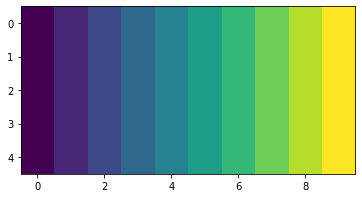

In [1043]:
# d) Plot the array using matplotlib imshow

plt.imshow(output_array)

Q6. Multiply the resulting matrix from Q5 with the matrix of a picture of your choice. Plot the resulting matrix.

In [0]:
# a) Open the picture of my choice 

image = plt.imread("Ada_Lovelace_portrait.jpg")

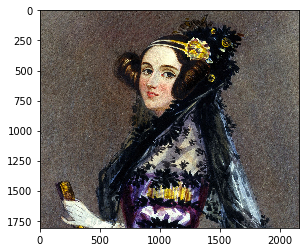

In [1045]:
# b) Show the picture of my choice 

plt.imshow(image)

In [1046]:
# c) Get the dimensions of the image

image.shape

(1809, 2159, 3)

In [0]:
# d) Generate a matrix of the cognate size

#transformation_matrix = incremental_shape(1809, 2159)
transformation_matrix = incremental_shape(image.shape[0], image.shape[1])

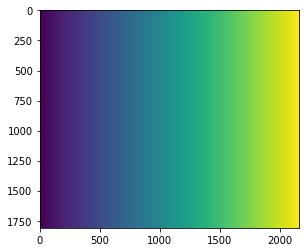

In [1048]:
# e) Plot the transformation matrix

plt.imshow(transformation_matrix)

In [1049]:
# f) Check the dimensions of the transformation matrix

transformation_matrix.shape

(1809, 2159)

In [0]:
# g) Recast transformation matrix as a float 

transformation_matrix_float = transformation_matrix.astype(float)

In [0]:
# h) Make a copy that can be modified because the input image is read only 

image_copy = image.copy()

In [0]:
# i) Recast it as a float 

image_copy_float = image_copy.astype(float)

In [0]:
# j) apply the matrix to r, g, and b channels

for i in range(3):
    image_copy_float[:,:,i] *= transformation_matrix_float

In [0]:
# k) recast as a int

image_copy_int = image_copy_float.astype(int)

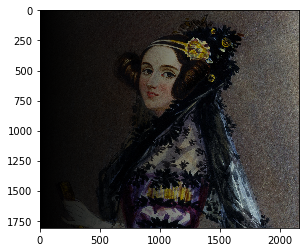

In [1055]:
plt.imshow(image_copy_int)

**Part II**

Creating some helper functions

In [1056]:
# Create a function which makes a filter of certain size that have brighter center and darker edges, based on Euclidean distance

def bright_center_filter(m, n):
    filter = np.ones(m*n)
    filter.shape = (m, n)
    center_x = n // 2
    center_y = m // 2
    for y in range(m):
        for x in range(n):
            filter[y, x] = np.sqrt((y - center_y)**2 + (x - center_x)**2)
    filter = filter / filter.max()
    filter = filter + 1
    filter = 1 / filter
    return filter

# Try the function
new_filter = bright_center_filter(image.shape[0], image.shape[1])
new_filter
#new_filter.shape

array([[0.5       , 0.50013615, 0.50027232, ..., 0.50027232, 0.50013615,
        0.5       ],
       [0.50011405, 0.50025032, 0.50038661, ..., 0.50038661, 0.50025032,
        0.50011405],
       [0.50022807, 0.50036447, 0.50050089, ..., 0.50050089, 0.50036447,
        0.50022807],
       ...,
       [0.50022807, 0.50036447, 0.50050089, ..., 0.50050089, 0.50036447,
        0.50022807],
       [0.50011405, 0.50025032, 0.50038661, ..., 0.50038661, 0.50025032,
        0.50011405],
       [0.5       , 0.50013615, 0.50027232, ..., 0.50027232, 0.50013615,
        0.5       ]])

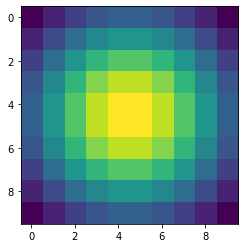

In [1057]:
# Create a function which makes a filter of certain size that have brighter center and darker edges, based on Normal (Gaussian) distribution

def  gaussian_filter(column, row):
    center_column = (column - 1) / 2
    center_row = (row - 1) / 2
    sigma = np.sqrt(column**2 + row**2)/4
    kernal = np.zeros((column, row))
    for i in range(column):
        for j in range(row):
            diff = np.sqrt((i - center_column)**2 + (j - center_row)**2)
            kernal[i,j] = np.exp( -(diff**2)/(2*sigma**2))
    kernal = kernal/np.average(kernal)
    return (kernal)

plt.imshow(gaussian_filter(10, 10))

In [0]:
# Create a function for changing contrast and brightness

def change_contrast_and_brightness(image, alpha=1.0, beta=0):
    # alpha = 1.0 # Simple contrast control
    # beta = 0    # Simple brightness control
    new_image = np.zeros(image.shape, image.dtype)
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            for c in range(image.shape[2]):
                new_image[y,x,c] = np.clip(alpha*image[y,x,c] + beta, 0, 255)
    return new_image

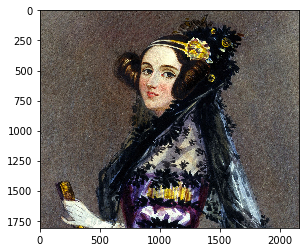

In [1059]:
# Show Original Image
plt.imshow(image)

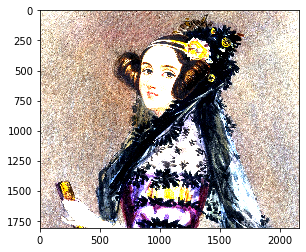

In [1060]:
# Try the function
new_image = change_contrast_and_brightness(image, 2.5, -20)
# Show New Image
plt.imshow(new_image)

**Implementation of AMARO filter**

This filter adds more light to the centre of the photo and darkens around the edges.

In [0]:
def apply_amaro(image):
    image_copy = image.copy()
    image_copy_float = image_copy.astype(float)
    y, x, z = image.shape
    bright_center = bright_center_filter(y, x)
    bright_center_float = bright_center.astype(float)
    image_amared = image_copy_float
    image_amared[:, :, 0] *= bright_center_float * 1.6
    image_amared[:, :, 1] *= bright_center_float * 1.6
    image_amared[:, :, 2] *= bright_center_float * 1.6
    image_amared = image_amared.astype(int)
    return image_amared

def apply_amaro_gauss(image):
    image_copy = image.copy()
    image_copy_float = image_copy.astype(float)
    y, x, z = image.shape
    bright_center = gaussian_filter(y, x)
    bright_center_float = bright_center.astype(float)
    image_amared = image_copy_float
    image_amared[:, :, 0] *= bright_center_float
    image_amared[:, :, 1] *= bright_center_float
    image_amared[:, :, 2] *= bright_center_float
    image_amared = image_amared.astype(int)
    return image_amared

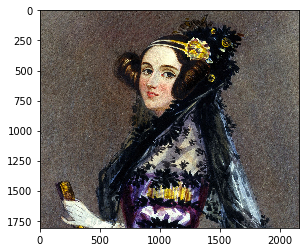

In [1062]:
# Show the original image:
plt.imshow(image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


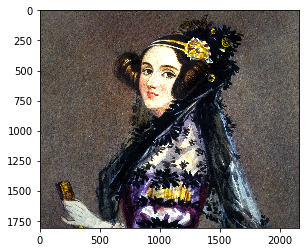

In [1063]:
# Apply AMARO filter and show result (Euclidean filter)
image_amared = apply_amaro(image)
plt.imshow(image_amared)
#image_amared

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


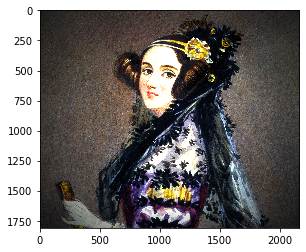

In [1064]:
# Apply AMARO filter and show result (Gaussian filter)
image_amared_gauss = apply_amaro_gauss(image)
plt.imshow(image_amared_gauss)
#image_amared_gauss

**Implementation of MAYFAIR filter**

Adds a warm pinkish tone and subtle vignetting that brightens the center of the photo.

In [0]:
def apply_mayfair(image):
    image_copy = image.copy()
    image_copy_float = image_copy.astype(float)
    y, x, z = image.shape
    bright_center = bright_center_filter(y, x)
    bright_center_float = bright_center.astype(float)
    image_mayfair = image_copy_float
    image_mayfair[:, :, 0] *= bright_center_float * 1.8
    image_mayfair[:, :, 1] *= bright_center_float * 1.5
    image_mayfair[:, :, 2] *= bright_center_float * 1.5
    image_mayfair = image_mayfair.astype(int)
    return image_mayfair

def apply_mayfair_gauss(image):
    image_copy = image.copy()
    image_copy_float = image_copy.astype(float)
    y, x, z = image.shape
    bright_center = gaussian_filter(y, x)
    bright_center_float = bright_center.astype(float)
    image_mayfair = image_copy_float
    image_mayfair[:, :, 0] *= bright_center_float * 1.2
    image_mayfair[:, :, 1] *= bright_center_float * 0.9
    image_mayfair[:, :, 2] *= bright_center_float * 0.9
    image_mayfair = image_mayfair.astype(int)
    return image_mayfair

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


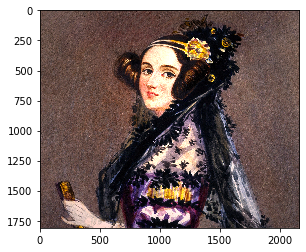

In [1066]:
# Apply MAYFAIR filter and show result (Euclidean filter)
image_mayfair = apply_mayfair(image)
plt.imshow(image_mayfair)
#image_mayfair

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


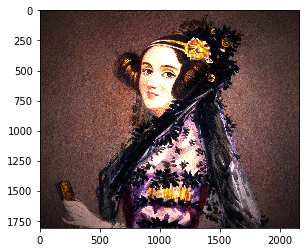

In [1067]:
# Apply MAYFAIR filter and show result (Gaussian filter)
image_mayfair_gauss = apply_mayfair_gauss(image)
plt.imshow(image_mayfair_gauss)
#image_mayfair_gauss

**Implementation of RISE filter**

Rise gives your photos a nice glow and warmth by adding yellow tones.

In [0]:
def apply_rise(image):
    image_copy = image.copy()
    image_copy_float = image_copy.astype(float)
    y, x, z = image.shape
    bright_center = bright_center_filter(y, x)
    bright_center_float = bright_center.astype(float)
    image_rised = image_copy_float
    image_rised[:, :, 0] *= bright_center_float * 2
    image_rised[:, :, 1] *= bright_center_float * 2
    image_rised = image_rised.astype(int)
    return image_rised

def apply_rise_gauss(image):
    image_copy = image.copy()
    image_copy_float = image_copy.astype(float)
    y, x, z = image.shape
    bright_center = gaussian_filter(y, x)
    bright_center_float = bright_center.astype(float)
    image_rised = image_copy_float
    image_rised[:, :, 0] *= bright_center_float * 1.2
    image_rised[:, :, 1] *= bright_center_float * 1.2
    image_rised = image_rised.astype(int)
    return image_rised

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


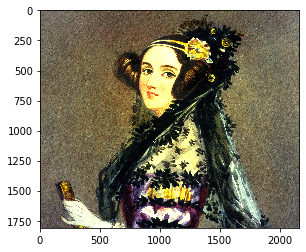

In [1069]:
# Apply RISE filter and show result (Euclidean filter)
image_rised = apply_rise(image)
plt.imshow(image_rised)
#image_rised

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


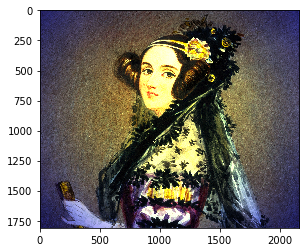

In [1070]:
# Apply RISE filter and show result (Gaussian filter)
image_rised_gauss = apply_rise_gauss(image)
plt.imshow(image_rised_gauss)
#image_rised_gauss

**Implementation of HUDSON filter**

Hudson emphasizes light in your image and gives your photos a bluish, colder feel.

In [0]:
def apply_hudson(image):
    image_copy = image.copy()
    image_copy_float = image_copy.astype(float)
    y, x, z = image.shape
    bright_center = bright_center_filter(y, x)
    bright_center_float = bright_center.astype(float)
    image_hudsoned = image_copy_float
    image_hudsoned[:, :, 0] *= bright_center_float * 2.2
    image_hudsoned[:, :, 1] *= bright_center_float * 2.2
    image_hudsoned[:, :, 2] *= bright_center_float * 2.8
    image_hudsoned = image_hudsoned.astype(int)
    return image_hudsoned

def apply_hudson_gauss(image):
    image_copy = image.copy()
    image_copy_float = image_copy.astype(float)
    y, x, z = image.shape
    bright_center = gaussian_filter(y, x)
    bright_center_float = bright_center.astype(float)
    image_hudsoned = image_copy_float
    image_hudsoned[:, :, 0] *= bright_center_float
    image_hudsoned[:, :, 1] *= bright_center_float
    image_hudsoned[:, :, 2] *= bright_center_float * 1.2
    image_hudsoned = image_hudsoned.astype(int)
    return image_hudsoned

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


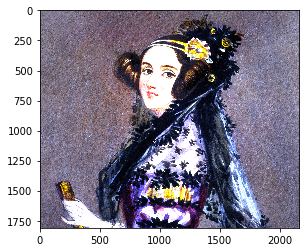

In [1072]:
# Apply HUDSON filter and show result (Euclidean filter)
image_hudsoned = apply_hudson(image)
plt.imshow(image_hudsoned)
#image_hudsoned

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


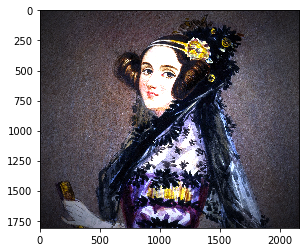

In [1073]:
# Apply HUDSON filter and show result (Gaussian filter)
image_hudsoned_gauss = apply_hudson_gauss(image)
plt.imshow(image_hudsoned_gauss)
#image_hudsoned_gauss

**Implementation of WILLOW filter**

Willow is a monochrome filter that adds some subtle purple tones to your photo.

In [0]:
def apply_willow_gauss(image):
    image_copy = image.copy()
    image_copy_float = image_copy.astype(float)
    image_inkwelled = image_copy_float
    y, x, z = image.shape
    bright_center = gaussian_filter(y, x)
    bright_center_float = bright_center.astype(float)
    image_inkwelled[:, :, 0] = image_inkwelled[:, :, 0] + image_inkwelled[:, :, 1] + image_inkwelled[:, :, 2] / 3
    image_inkwelled[:, :, 1] = image_inkwelled[:, :, 0]
    image_inkwelled[:, :, 2] = image_inkwelled[:, :, 0]
    image_inkwelled[:, :, 0] *= bright_center_float * 0.6 + 0.05
    image_inkwelled[:, :, 1] *= bright_center_float * 0.6
    image_inkwelled[:, :, 2] *= bright_center_float * 0.6
    image_inkwelled = image_inkwelled.astype(int)
    return image_inkwelled

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


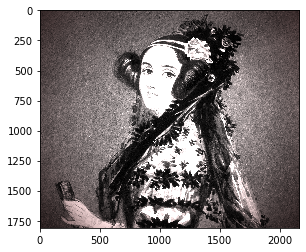

In [1075]:
# Apply WILLOW filter and show result
image_willow = apply_willow_gauss(image)
plt.imshow(image_willow)
#image_willow

**Implementation of INKWELL filter**

Inkwell adds high contrast and makes your photos black and white.

In [0]:
def apply_inkwell(image):
    image_copy = image.copy()
    image_copy_float = image_copy.astype(float)
    image_inkwelled = image_copy_float
    image_inkwelled[:, :, 0] = image_inkwelled[:, :, 0] + image_inkwelled[:, :, 1] + image_inkwelled[:, :, 2] / 3
    image_inkwelled[:, :, 1] = image_inkwelled[:, :, 0]
    image_inkwelled[:, :, 2] = image_inkwelled[:, :, 0]
    image_inkwelled = image_inkwelled.astype(int)
    return image_inkwelled

def apply_inkwell_contrast(image):
    image_copy = image.copy()
    image_copy_float = image_copy.astype(float)
    image_inkwelled = image_copy_float
    image_inkwelled[:, :, 0] = image_inkwelled[:, :, 0] + image_inkwelled[:, :, 1] + image_inkwelled[:, :, 2] / 3
    image_inkwelled[:, :, 1] = image_inkwelled[:, :, 0]
    image_inkwelled[:, :, 2] = image_inkwelled[:, :, 0]
    image_inkwelled = image_inkwelled.astype(int)
    image_inkwelled = change_contrast_and_brightness(image_inkwelled, 1.2, -30)
    return image_inkwelled

def apply_inkwell_gauss(image):
    image_copy = image.copy()
    image_copy_float = image_copy.astype(float)
    image_inkwelled = image_copy_float
    y, x, z = image.shape
    bright_center = gaussian_filter(y, x)
    bright_center_float = bright_center.astype(float)
    image_inkwelled[:, :, 0] = image_inkwelled[:, :, 0] + image_inkwelled[:, :, 1] + image_inkwelled[:, :, 2] / 3
    image_inkwelled[:, :, 1] = image_inkwelled[:, :, 0]
    image_inkwelled[:, :, 2] = image_inkwelled[:, :, 0]
    image_inkwelled[:, :, 0] *= bright_center_float * 0.6
    image_inkwelled[:, :, 1] *= bright_center_float * 0.6
    image_inkwelled[:, :, 2] *= bright_center_float * 0.6
    image_inkwelled = image_inkwelled.astype(int)
    return image_inkwelled

def apply_inkwell_gauss_contrast(image):
    image_copy = image.copy()
    image_copy_float = image_copy.astype(float)
    image_inkwelled = image_copy_float
    y, x, z = image.shape
    bright_center = gaussian_filter(y, x)
    bright_center_float = bright_center.astype(float)
    image_inkwelled[:, :, 0] = image_inkwelled[:, :, 0] + image_inkwelled[:, :, 1] + image_inkwelled[:, :, 2] / 3
    image_inkwelled[:, :, 1] = image_inkwelled[:, :, 0]
    image_inkwelled[:, :, 2] = image_inkwelled[:, :, 0]
    image_inkwelled[:, :, 0] *= bright_center_float * 0.6
    image_inkwelled[:, :, 1] *= bright_center_float * 0.6
    image_inkwelled[:, :, 2] *= bright_center_float * 0.6
    image_inkwelled = image_inkwelled.astype(int)
    image_inkwelled = change_contrast_and_brightness(image_inkwelled, 1.2, -30)
    return image_inkwelled

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


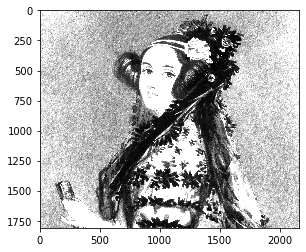

In [1077]:
# Apply INKWELL filter and show result
image_inkwelled = apply_inkwell(image)
plt.imshow(image_inkwelled)
#image_inkwelled

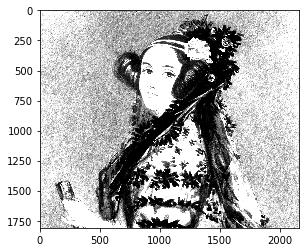

In [1078]:
# Apply INKWELL filter and show result
image_inkwelled_c = apply_inkwell_contrast(image)
plt.imshow(image_inkwelled_c)
#image_inkwelled_c

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


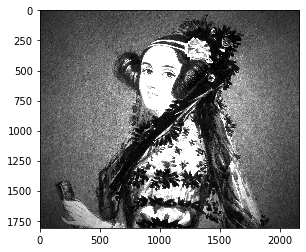

In [1079]:
# Apply INKWELL filter and show result (Gaussian filter)
image_inkwelled_gauss = apply_inkwell_gauss(image)
plt.imshow(image_inkwelled_gauss)
#image_inkwelled_gauss

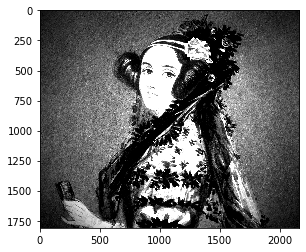

In [1080]:
# Apply INKWELL filter and show result
image_inkwelled_gc = apply_inkwell_gauss_contrast(image)
plt.imshow(image_inkwelled_gc)
#image_inkwelled_gc

**Implementation of KELVIN filter**

Gives photos a retro look by boosting the earth tones green, brown and orange and adds brightness.

In [0]:
def apply_kelvin_gauss(image):
    image_copy = image.copy()
    image_copy_float = image_copy.astype(float)
    y, x, z = image.shape
    bright_center = gaussian_filter(y, x)
    bright_center_float = bright_center.astype(float)
    image_kelvined = image_copy_float
    image_kelvined[:, :, 0] *= bright_center_float * 1.3
    image_kelvined[:, :, 1] *= bright_center_float * 1.3
    image_kelvined[:, :, 2] *= bright_center_float * 0.8
    image_kelvined = image_kelvined.astype(int)
    image_kelvined = change_contrast_and_brightness(image_kelvined, 1.0, 30)
    return image_kelvined

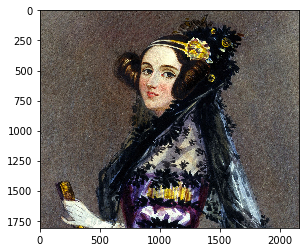

In [1082]:
# Show Original Image
plt.imshow(image)

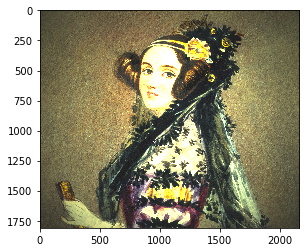

In [1083]:
# Apply KELVIN filter and show result
image_kelvined = apply_kelvin_gauss(image)
plt.imshow(image_kelvined)
#image_kelvined